# Laboratório #3

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá usar o regressor logístico implementado abaixo para encontrar os pesos da função hipótese de classificação, calcular os erros de treinamento e validação e plotar as regiões de decisão e a matriz de confusão.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

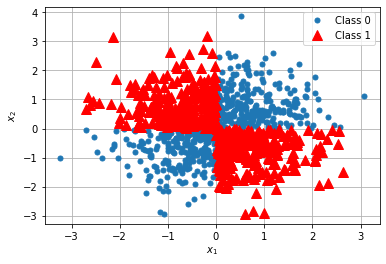

In [14]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.special import expit
import seaborn as sns

# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Generating the two classes.
X = np.random.randn(N, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=float)

# Plotting the two classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

2. Execute a célula abaixo para definir a classe que implementa o regressor logístico.

In [2]:
class LogisticRegressorWithGD():
    
    alpha = 0
    numEpochs = 0
    a = 0
    a_min = 0
    
    def __init__(self, alpha=0.1, numEpochs=1):
        self.alpha = alpha
        self.numEpochs = numEpochs

    def hypothesis(self, X):
        '''Função hipótese.'''
        # Função discriminante
        g = X.dot(self.a)
        # Função de limiar de decisão sigmóide.
        h = expit(g)
        return h

    def predict(self, X):
        '''Função que classifica os exemplos de entrada.'''
        h = self.hypothesis(X)
        # Loop usado para quantizar os valores de saída da função hipótese.
        c = np.zeros((len(h), 1))
        for i in range(0, len(h)):
            if(h[i] >= 0.5):
                c[i,0] = 1.0
        return c

    def error_function(self, X, y, eps=1e-7):
        '''Função usada para calcular o erro médio cometido pelo classificador.'''
        h = self.hypothesis(X)
        error = -(1/len(y))*np.sum(y*(np.log(h+eps)) + (1-y)*(np.log((1-h)+eps)))
        return error

    def fit(self, X_train, y_train, X_test, y_test):
        '''Gradient descent solution.'''

        # Number of examples.
        N = len(y_train)

        # Reshaping into column vectors.
        y_train = y_train.reshape(N, 1)
        y_test = y_test.reshape(len(y_test), 1)

        # Random initialization of parameters.
        self.a = np.random.randn(X_train.shape[1], 1)

        # Create array for storing error values.
        Jgd = np.zeros(self.numEpochs+1)
        Jgd_v = np.zeros(self.numEpochs+1)

        # Calculate initial error.
        Jgd[0] = self.error_function(X_train, y_train)
        Jgd_v[0] = self.error_function(X_test, y_test)

        # Gradient-descent loop.
        minimum_val_error = float("inf")
        iteration = 0
        while iteration < self.numEpochs:
            # Update weights.
            gradients = -(1/N)*X_train.T.dot(y_train - self.hypothesis(X_train))
            self.a = self.a - self.alpha*gradients

            # Calculating training and validation errors.
            Jgd[iteration+1] = self.error_function(X_train, y_train)
            Jgd_v[iteration+1] = self.error_function(X_test, y_test)

            # Early-stop: store weights for the smallest error ever.
            if(Jgd_v[iteration+1] < minimum_val_error):
                minimum_val_error = Jgd_v[iteration+1]
                self.a_min = self.a

            # Update iteration number.
            iteration = iteration + 1

        return Jgd, Jgd_v, iteration, self.a_min, minimum_val_error, self.a

3. Analise o código do método `fit` da classe `logisticRegressorWithGD` definida acima e responda qual é a versão de gradiente descendente implementado neste método.

**DICA**
+ Verifique a quantidade de exemplos de treinamento utilizados para se atualizar os pesos da função hipótese.

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

4. Divida o conjunto total de exemplos em 70% para treinamento e 30% para validação.

In [1]:
# Digite aqui o código do exercício.

5. O polinômio que deve ser usado como função discriminante neste exercício é mostrado na sequência:

$$g(x) = a_0 + a_1x_1x_2.$$

Agora, de posse da função discriminante que separa as duas classes, altere as matrizes de atributos de treinamento e validação para que elas implementem esta função discriminante.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [2]:
# Digite aqui o código do exercício.

6. Treine o classificador usando uma instância da classe `LogisticRegressorWithGD`. Altere os valores dos parâmetros `alpha` e `numEpochs` até que a acurácia seja igual a 100%.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).
+ Altere o valor de `alpha` da seguinte forma: `0.01, 0.03, 0.1, 0.3, 1.0`.
+ Altere o valor de `numEpochs` de 1000 até no máximo 100000 épocas.

In [3]:
# Digite aqui o código do exercício.

7. Crie um gráfico que mostre os erros de treinamento e validação em função das iterações de aprendizagem.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [4]:
# Digite aqui o código do exercício.

8. Crie uma figura mostrando as regiões de decisão.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

In [5]:
# Digite aqui o código do exercício.

9. Plote a matriz de confusão deste classificador.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

In [6]:
# Digite aqui o código do exercício.

10. Analise a matriz de confusão e responda:

+ Quantos negativos falsos ocorreram?
+ Quantos positivos falsos ocorreram?
+ Quantos positivos verdadeiros ocorram?
+ Quantos negativos verdadeiros ocorram?

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_gradient_descent.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_gradient_descent.ipynb).

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

#### 2)  Neste exercício, você irá usar o regressor logístico da biblioteca SciKit-Learn  para resolver o problema de classificação do exercício anterior.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

**DICAS**

+ Notem que o conjunto de dados já é dividido em conjuntos de treinamento e validação na célula abaixo.

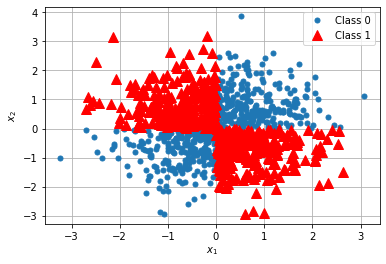

In [9]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.special import expit
import seaborn as sns

# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

# Number of examples.
N = 1000

# Generating the two classes.
X = np.random.randn(N, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=float)

# Plotting the two classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. O polinômio que deve ser usado como função discriminante neste exercício é mostrado na sequência:

$$g(x) = a_0 + a_1x_1x_2.$$

Agora, de posse da função discriminante que separa as duas classes, altere as matrizes de atributos de treinamento e validação para que elas implementem esta função discriminante.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).

In [7]:
# Digite aqui o código do exercício.

3. Treine o classificador logístico da biblioteca SciKit-Learn usando uma instância da classe `LogisticRegression`. Após o treinamento, apresente a acurácia obtida por este classificador para o conjunto de validação.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).
+ Você não precisa importar a classe, pois ela já foi importada no item 1 deste exercício.
+ Configure o parâmetro `penalty` com a string `none`, assim como no notebook de exemplo.

In [8]:
# Digite aqui o código do exercício.

4. Crie uma figura mostrando as regiões de decisão.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).
+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.

In [9]:
# Digite aqui o código do exercício.

5. Plote a matriz de confusão deste classificador.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [logistic_regression_with_scikit_learn.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/logistic_regression_with_scikit_learn.ipynb).

In [10]:
# Digite aqui o código do exercício.